### Note
* BLS Employment (Statistician) Analysis

In [82]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Files to Load 
file_to_load_2014 = "bls_cve/bls_2014.csv"
file_to_load_2015 = "bls_cve/bls_2015.csv"
file_to_load_2016 = "bls_cve/bls_2016.csv"
file_to_load_2017 = "bls_cve/bls_2017.csv"

# Read Files and store into Pandas data frame
bls_2014_df = pd.read_csv(file_to_load_2014, dtype='unicode')
bls_2015_df = pd.read_csv(file_to_load_2015, dtype='unicode')
bls_2016_df = pd.read_csv(file_to_load_2016, dtype='unicode')
bls_2017_df = pd.read_csv(file_to_load_2017, dtype='unicode')
bls_2014_df.head()

,NAICS,NAICS_TITLE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,PCT_TOTAL,PCT_RPT,H_MEAN,...,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY,YEAR
0,115100,Support Activities for Crop Production,15-1141,Database Administrators,detailed,70,17,0.02,1,35.94,...,43.87,59.54,"42,070","53,240","70,520","91,250","123,830",NaN,NaN,2014
1,115200,Support Activities for Animal Production,13-1161,Market Research Analysts and Marketing Special...,detailed,50,33.7,0.18,1,26.23,...,30.39,43.28,"28,640","40,660","45,680","63,220","90,030",NaN,NaN,2014
2,211100,Oil and Gas Extraction,13-1141,"Compensation, Benefits, and Job Analysis Speci...",detailed,200,8.5,0.1,1,35.48,...,41.59,54.31,"41,530","53,090","69,090","86,500","112,970",NaN,NaN,2014
3,211100,Oil and Gas Extraction,13-1161,Market Research Analysts and Marketing Special...,detailed,320,10.2,0.17,2,39.28,...,48.03,66.19,"41,760","54,570","74,950","99,900","137,680",NaN,NaN,2014
4,211100,Oil and Gas Extraction,13-2031,Budget Analysts,detailed,60,26.5,0.03,~,43.42,...,50.1,63.68,"51,830","64,880","83,730","104,210","132,450",NaN,NaN,2014


In [99]:
# Clean up data. Remove non-numeric values/remove commas/convert to number
bls_cleaned_2014_df = bls_2014_df[bls_2014_df.TOT_EMP != '**']
copy_2014_df = bls_cleaned_2014_df.copy()
copy_2014_df['TOT_EMP'] = bls_cleaned_2014_df['TOT_EMP'].str.replace(',', '')
copy_2014_df['TOT_EMP'] = pd.to_numeric(copy_2014_df['TOT_EMP']).fillna(0).astype(int)

bls_cleaned_2015_df = bls_2015_df[bls_2015_df.TOT_EMP != '**']
copy_2015_df = bls_cleaned_2015_df.copy()
copy_2015_df['TOT_EMP'] = bls_cleaned_2015_df['TOT_EMP'].str.replace(',', '')
copy_2015_df['TOT_EMP'] = pd.to_numeric(copy_2015_df['TOT_EMP']).fillna(0).astype(int)

bls_cleaned_2016_df = bls_2016_df[bls_2016_df.TOT_EMP != '**']
copy_2016_df = bls_cleaned_2016_df.copy()
copy_2016_df['TOT_EMP'] = bls_cleaned_2016_df['TOT_EMP'].str.replace(',', '')
copy_2016_df['TOT_EMP'] = pd.to_numeric(copy_2016_df['TOT_EMP']).fillna(0).astype(int)

bls_cleaned_2017_df = bls_2017_df[bls_2017_df.TOT_EMP != '**']
copy_2017_df = bls_cleaned_2017_df.copy()
copy_2017_df['TOT_EMP'] = bls_cleaned_2017_df['TOT_EMP'].str.replace(',', '')
copy_2017_df['TOT_EMP'] = pd.to_numeric(copy_2017_df['TOT_EMP']).fillna(0).astype(int)

In [84]:
# Create new datafromes to contain total emploee number for each occ_title
emp_2014_df = copy_2014_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2015_df = copy_2015_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2016_df = copy_2016_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2017_df = copy_2017_df.groupby(['OCC_TITLE']).agg({'TOT_EMP':'sum'})
emp_2017_df

,TOT_EMP
OCC_TITLE,
Actuaries,18700
Budget Analysts,52850
"Compensation, Benefits, and Job Analysis Specialists",79340
Computer Systems Analysts,577610
Credit Analysts,73470
Database Administrators,112240
Financial Analysts,289830
Information Security Analysts,103700
Market Research Analysts and Marketing Specialists,594250


In [85]:
# Merge above dataframes and rename coloumns
emp_2014_2015_df = pd.merge(emp_2014_df, emp_2015_df, on='OCC_TITLE', how='outer')
emp_2014_2015_df = emp_2014_2015_df.rename(columns={"TOT_EMP_x":"2014", "TOT_EMP_y":"2015"})

emp_2014_2015_2016_df = pd.merge(emp_2014_2015_df, emp_2016_df, on='OCC_TITLE', how='outer')
emp_2014_2015_2016_df = emp_2014_2015_2016_df.rename(columns={"TOT_EMP":"2016"})

emp_df = pd.merge(emp_2014_2015_2016_df, emp_2017_df, on='OCC_TITLE', how='outer')
emp_df = emp_df.rename(columns={"TOT_EMP":"2017"})
emp_df

,2014,2015,2016,2017
OCC_TITLE,,,,
Actuaries,21160,19420,19550,18700
Budget Analysts,54760,54150,52520,52850
"Compensation, Benefits, and Job Analysis Specialists",79090,78030,77580,79340
Computer Systems Analysts,524850,550830,563280,577610
Credit Analysts,67980,69390,71480,73470
Database Administrators,110430,112050,112050,112240
Financial Analysts,258800,264840,279820,289830
Information Security Analysts,77210,82870,94710,103700
Market Research Analysts and Marketing Specialists,466940,504920,556730,594250


In [86]:
emp_df['2014 to 2015'] = ((emp_df['2015'] - emp_df['2014'])/emp_df['2014']*100).round(2)
emp_df['2015 to 2016'] = ((emp_df['2016'] - emp_df['2015'])/emp_df['2015']*100).round(2)
emp_df['2016 to 2017'] = ((emp_df['2017'] - emp_df['2016'])/emp_df['2016']*100).round(2)
emp_df

,2014,2015,2016,2017,2014 to 2015,2015 to 2016,2016 to 2017
OCC_TITLE,,,,,,,
Actuaries,21160,19420,19550,18700,-8.22,0.67,-4.35
Budget Analysts,54760,54150,52520,52850,-1.11,-3.01,0.63
"Compensation, Benefits, and Job Analysis Specialists",79090,78030,77580,79340,-1.34,-0.58,2.27
Computer Systems Analysts,524850,550830,563280,577610,4.95,2.26,2.54
Credit Analysts,67980,69390,71480,73470,2.07,3.01,2.78
Database Administrators,110430,112050,112050,112240,1.47,0.00,0.17
Financial Analysts,258800,264840,279820,289830,2.33,5.66,3.58
Information Security Analysts,77210,82870,94710,103700,7.33,14.29,9.49
Market Research Analysts and Marketing Specialists,466940,504920,556730,594250,8.13,10.26,6.74


Text(0.5, 1.0, 'Total Number of Employment Change (Statistician)')

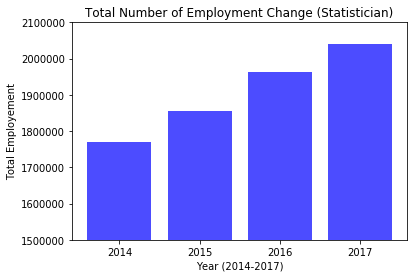

In [87]:
x_axis_year = np.arange(4)
y_axis_total = [emp_df['2014'].sum(), emp_df['2015'].sum(), emp_df['2016'].sum(), emp_df['2017'].sum()]

summary_bar = plt.bar(x_axis_year, y_axis_total, color='blue', align="center", alpha=0.7)

tick_locations = [value for value in x_axis_year]
plt.xticks(tick_locations, ["2014", "2015", "2016", "2017"])

plt.ylim(1500000, 2100000)

plt.xlabel('Year (2014-2017)')
plt.ylabel('Total Employement')
plt.title('Total Number of Employment Change (Statistician)')

In [ ]:
plt.show()

In [105]:
# Copy of the dataframe of numbere of employments
emp_number_df = emp_df[['2014', '2015', '2016', '2017']].copy()
emp_number_df = emp_number_df.transpose()
#emp_number_df.reset_index(inplace=True)
emp_number_df

OCC_TITLE,Actuaries,Budget Analysts,"Compensation, Benefits, and Job Analysis Specialists",Computer Systems Analysts,Credit Analysts,Database Administrators,Financial Analysts,Information Security Analysts,Market Research Analysts and Marketing Specialists,Operations Research Analysts,Statisticians
2014,21160,54760,79090,524850,67980,110430,258800,77210,466940,82550,25200
2015,19420,54150,78030,550830,69390,112050,264840,82870,504920,90710,28960
2016,19550,52520,77580,563280,71480,112050,279820,94710,556730,103450,32730
2017,18700,52850,79340,577610,73470,112240,289830,103700,594250,102240,35190


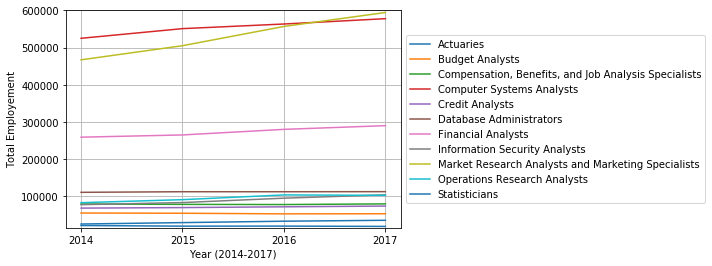

In [107]:
#ax = emp_number_df.plot('index', 'Actuaries', marker='o', markersize=5, linewidth=1, c='red', label='Actuaries', title='Total Employeement Count')
#emp_number_df.plot('index', 'Budget Analysts', marker='^', markersize=5, linewidth=1, c='blue', label='Budget Analysts', ax=ax)
#emp_number_df.plot('index', 'Computer Systems Analysts', marker='s', markersize=5, linewidth=1, c='green', label='Computer Systems Analysts', ax=ax)
for i in emp_number_df.columns:
    if i != 'index':
       plt.plot(emp_number_df.index, emp_number_df[f'{i}'],label=f'{i}')

#plt.xlim(2014, 2017)
plt.ylim(15000, 600000)
plt.grid()
plt.xlabel('Year (2014-2017)')
plt.ylabel('Total Employement')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [133]:
plt.show()

In [103]:
# Copy of the dataframe of numbere of employments
emp_change_df = emp_df[['2014 to 2015', '2015 to 2016', '2016 to 2017']].copy()
emp_change_df = emp_change_df.transpose()
#emp_change_df.reset_index(inplace=True)
emp_change_df

OCC_TITLE,Actuaries,Budget Analysts,"Compensation, Benefits, and Job Analysis Specialists",Computer Systems Analysts,Credit Analysts,Database Administrators,Financial Analysts,Information Security Analysts,Market Research Analysts and Marketing Specialists,Operations Research Analysts,Statisticians
2014 to 2015,-8.22,-1.11,-1.34,4.95,2.07,1.47,2.33,7.33,8.13,9.88,14.92
2015 to 2016,0.67,-3.01,-0.58,2.26,3.01,0.00,5.66,14.29,10.26,14.04,13.02
2016 to 2017,-4.35,0.63,2.27,2.54,2.78,0.17,3.58,9.49,6.74,-1.17,7.52


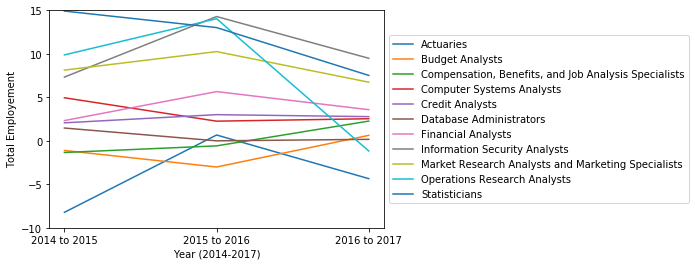

In [104]:
for i in emp_change_df.columns:
    if i != 'index':
       plt.plot(emp_change_df.index, emp_change_df[f'{i}'],label=f'{i}')

#plt.xlim(2014, 2017)
plt.ylim(-10, 15)
#plt.grid()
plt.xlabel('Year (2014-2017)')
plt.ylabel('Total Employement')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))